In [45]:
!pip install pandas
!pip install seaborn

In [46]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import seaborn as sns

In [47]:
### Loading the Dataset
df=pd.read_csv('./Oakland_Auto_Theft.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   CrimeType    149889 non-null  object
 1   DateTime     152727 non-null  object
 2   CaseNumber   152727 non-null  object
 3   Description  152727 non-null  object
 4   PoliceBeat   152196 non-null  object
 5   Address      152677 non-null  object
 6   City         152727 non-null  object
 7   State        152727 non-null  object
 8   Location     152726 non-null  object
dtypes: object(9)
memory usage: 10.5+ MB


In [48]:
### Police Beat Unique values
df['PoliceBeat'].unique()

array(['31Y', '06X', '16Y', '32Y', '07X', '27Y', '10Y', '31Z', '01X',
       '15X', '23X', '08X', '12X', '29X', '02Y', '34X', '77X', '05X',
       '14X', '32X', '33X', '10X', '27X', '26X', '24Y', '03Y', '35Y',
       '21Y', '14Y', '13Z', '35X', '18Y', '17X', '26Y', '13Y', '19X',
       '22Y', '25X', '02X', '30X', '20X', '30Y', '03X', '99X', '22X',
       '24X', '21X', '11X', '25Y', '05Y', '04X', '31X', '17Y', '13X',
       '12Y', '09X', '33Y', '28X', '16X', '18X', '35', '327', '32', 'PCW',
       '4', '5', '28', 'PDT2', nan, '17 Y', '6X', '02 X', '1', '94603',
       '3X', '2Y', '7X', '30 X', '8X', '17', '9X', '27 Y', '29', '1X',
       '4X', '3Y', '7', '06 X', '31 Z', '04Y', '1Y', '0', '22', '2X', 'X',
       '34Y', '5Y', '88X', 'P3', '30', '07', '34', '27', '21', '26', '08',
       '33', '24', '10', '12', '31', '20', '18', '03', '25', '5X', '16',
       '04', '02', '06', '09', '05', '19', '01', '8', '11', '23', '6',
       '13', '14', '9', '15', 'CCD2'], dtype=object)

In [49]:
### Convert string DateTime to DateTime type object
df['DateTime'] = pd.to_datetime(df['DateTime'])

C:\Windows\Temp\ipykernel_19476\3175685190.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DateTime'] = pd.to_datetime(df['DateTime'])


In [50]:

### Split Day, Month, Year, Hour in DateTime object
df['Day'] = df['DateTime'].dt.day
df['Month']= df['DateTime'].dt.month
df['Year']= df['DateTime'].dt.year
df['Hour']= df['DateTime'].dt.hour
df['DayOfWeek']= df['DateTime'].dt.weekday
df["DayOfWeekName"]= df['DateTime'].dt.strftime('%A')

In [51]:
### Dropping non-important features
df.drop(['CaseNumber', 'DateTime', 'Description', 'City', 'State'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CrimeType      149889 non-null  object
 1   PoliceBeat     152196 non-null  object
 2   Address        152677 non-null  object
 3   Location       152726 non-null  object
 4   Day            152727 non-null  int32 
 5   Month          152727 non-null  int32 
 6   Year           152727 non-null  int32 
 7   Hour           152727 non-null  int32 
 8   DayOfWeek      152727 non-null  int32 
 9   DayOfWeekName  152727 non-null  object
dtypes: int32(5), object(5)
memory usage: 8.7+ MB


In [52]:
df.head(5)

,CrimeType,PoliceBeat,Address,Location,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName
0,TOWED VEHICLE,31Y,9609 MADDUX DR,POINT (-122.186243032 37.736909007),30,9,2022,23,4,Friday
1,ROBBERY,06X,2420 SAN PABLO AV,POINT (-122.274354017 37.81511099),5,10,2022,3,2,Wednesday
2,STOLEN VEHICLE,16Y,1123 EL CENTRO AV,POINT (-122.219454982 37.810370982),27,11,2013,11,2,Wednesday
3,OTHER,32Y,2374 108TH AV,POINT (-122.153223028 37.740880981),19,12,2013,23,3,Thursday
4,STOLEN VEHICLE,07X,3129 SAN PABLO AV,POINT (-122.277448029 37.822463008),28,1,2014,11,1,Tuesday


In [53]:
### Split the location to X, Y coordinates
df[['Point','X', 'Y']] = df['Location'].str.split(' ', expand= True)

In [54]:
### Remove "(" ")" from X and Y columns
### Drop unnecessary 'Point' columns
df['X']= df['X'].str.slice(1)
df['Y'] = df['Y'].str.rstrip(')')
df.drop('Point', axis = 1, inplace= True)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   CrimeType      149889 non-null  object
 1   PoliceBeat     152196 non-null  object
 2   Address        152677 non-null  object
 3   Location       152726 non-null  object
 4   Day            152727 non-null  int32 
 5   Month          152727 non-null  int32 
 6   Year           152727 non-null  int32 
 7   Hour           152727 non-null  int32 
 8   DayOfWeek      152727 non-null  int32 
 9   DayOfWeekName  152727 non-null  object
 10  X              152726 non-null  object
 11  Y              152726 non-null  object
dtypes: int32(5), object(7)
memory usage: 11.1+ MB


In [56]:
df.head(5)

,CrimeType,PoliceBeat,Address,Location,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y
0,TOWED VEHICLE,31Y,9609 MADDUX DR,POINT (-122.186243032 37.736909007),30,9,2022,23,4,Friday,-122.186243032,37.736909007
1,ROBBERY,06X,2420 SAN PABLO AV,POINT (-122.274354017 37.81511099),5,10,2022,3,2,Wednesday,-122.274354017,37.81511099
2,STOLEN VEHICLE,16Y,1123 EL CENTRO AV,POINT (-122.219454982 37.810370982),27,11,2013,11,2,Wednesday,-122.219454982,37.810370982
3,OTHER,32Y,2374 108TH AV,POINT (-122.153223028 37.740880981),19,12,2013,23,3,Thursday,-122.153223028,37.740880981
4,STOLEN VEHICLE,07X,3129 SAN PABLO AV,POINT (-122.277448029 37.822463008),28,1,2014,11,1,Tuesday,-122.277448029,37.822463008


In [57]:
### Convert from String to FLoat
df['X'] = df['X'].astype(float)
df['Y'] = df['Y'].astype(float)

In [58]:
### Remove Location column
df.drop('Location', axis = 1, inplace= True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152727 entries, 0 to 152726
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CrimeType      149889 non-null  object 
 1   PoliceBeat     152196 non-null  object 
 2   Address        152677 non-null  object 
 3   Day            152727 non-null  int32  
 4   Month          152727 non-null  int32  
 5   Year           152727 non-null  int32  
 6   Hour           152727 non-null  int32  
 7   DayOfWeek      152727 non-null  int32  
 8   DayOfWeekName  152727 non-null  object 
 9   X              152726 non-null  float64
 10  Y              152726 non-null  float64
dtypes: float64(2), int32(5), object(4)
memory usage: 9.9+ MB


In [59]:
df['CrimeType'].replace(['STOLEN' ,'STOLEN VEH', 'AUTO THEFT', 'AUTO HTEFT', 'BURG - AUTO' ,'CARJACKING', 'STOLEN VEHICLE' ], 'STOLEN VEHICLE', inplace= True);

C:\Windows\Temp\ipykernel_19476\1749381059.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CrimeType'].replace(['STOLEN' ,'STOLEN VEH', 'AUTO THEFT', 'AUTO HTEFT', 'BURG - AUTO' ,'CARJACKING', 'STOLEN VEHICLE' ], 'STOLEN VEHICLE', inplace= True);


In [60]:
df['CrimeType'].replace(['RECOVERED O/S STOLEN', 'STOLEN AND RECOVERED VEHICLE','STOLEN  AND RECOVERED VEHICLE', 'RECOVERED VEHICLE - OAKLAND STOLEN', 'RECOVERED VEHICLE-OLD SYSTEM STOLEN', 'STOLEN/RECOVERED VEHICLE' ,'STOLEN/RECOVERED' ], 'STOLEN/RECOVERED', inplace= True);

In [61]:
def replace_values(x):
    if x == 'STOLEN VEHICLE' or x == 'STOLEN/RECOVERED':
        return x
    else:
        return 'OTHER'

In [62]:
df['CrimeType'] = df['CrimeType'].apply(replace_values)

In [63]:
df['CrimeType'].value_counts()

CrimeType
STOLEN VEHICLE      114728
STOLEN/RECOVERED     30486
OTHER                 7513
Name: count, dtype: int64

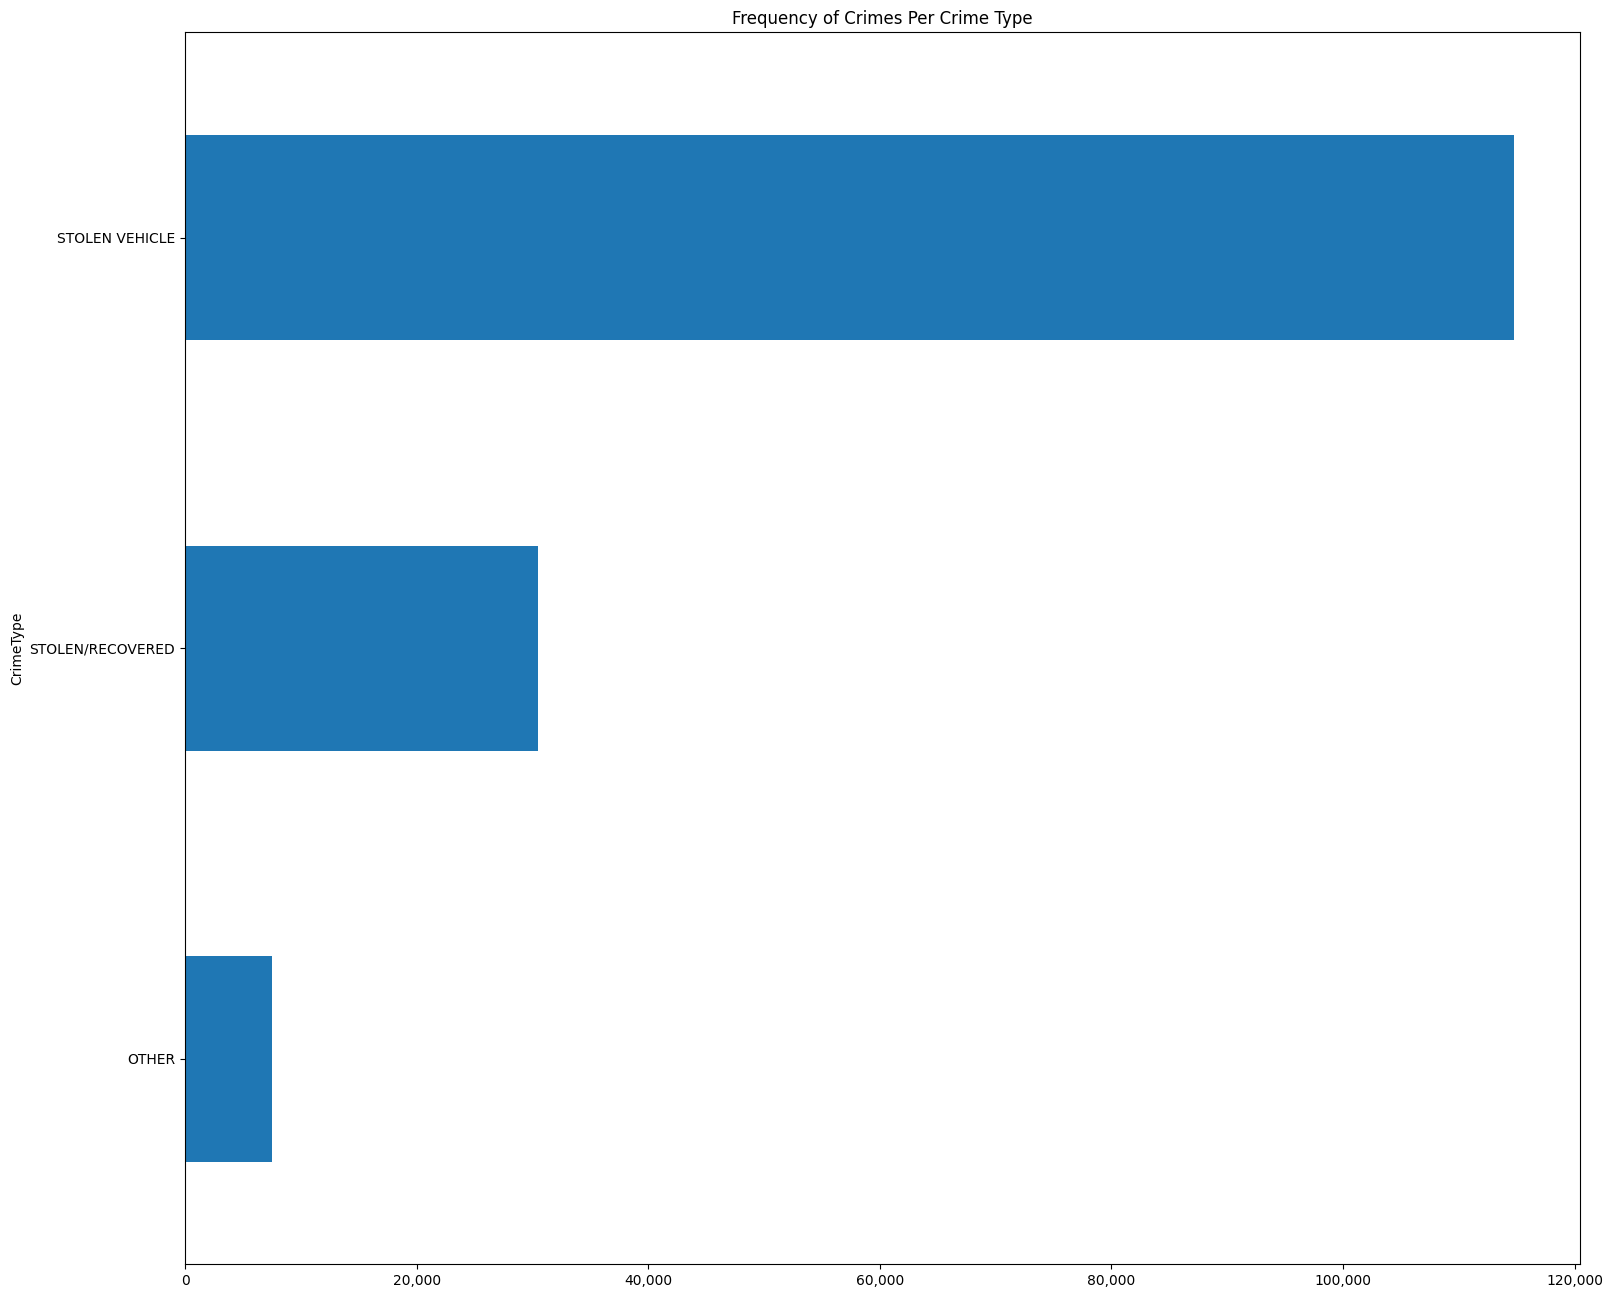

In [92]:
fig=plt.figure(figsize=(18, 16))
plt.title("Frequency of Crimes Per Crime Type")
plt.xlabel("Frequency of Crimes")
plt.ylabel("Type of Crime")
ax = df['CrimeType'].value_counts(ascending=True).plot(kind='barh')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [65]:
### Add Delimiter for Address
df["Address"]= df["Address"].str.replace(" ", ", " ,1)
df["Address"]= df["Address"].str[::-1]
df["Address"]= df["Address"].str.replace(" ", ", " ,1)
df["Address"]= df["Address"].str[::-1]

In [66]:
### Add AddressNum,  AddressName and StreetType
address_split = df["Address"].str.split(',', expand= True)
df["AddressNum"] = address_split[0]
df["AddressName"] = address_split[1]
df["StreetType"] = address_split[2]

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

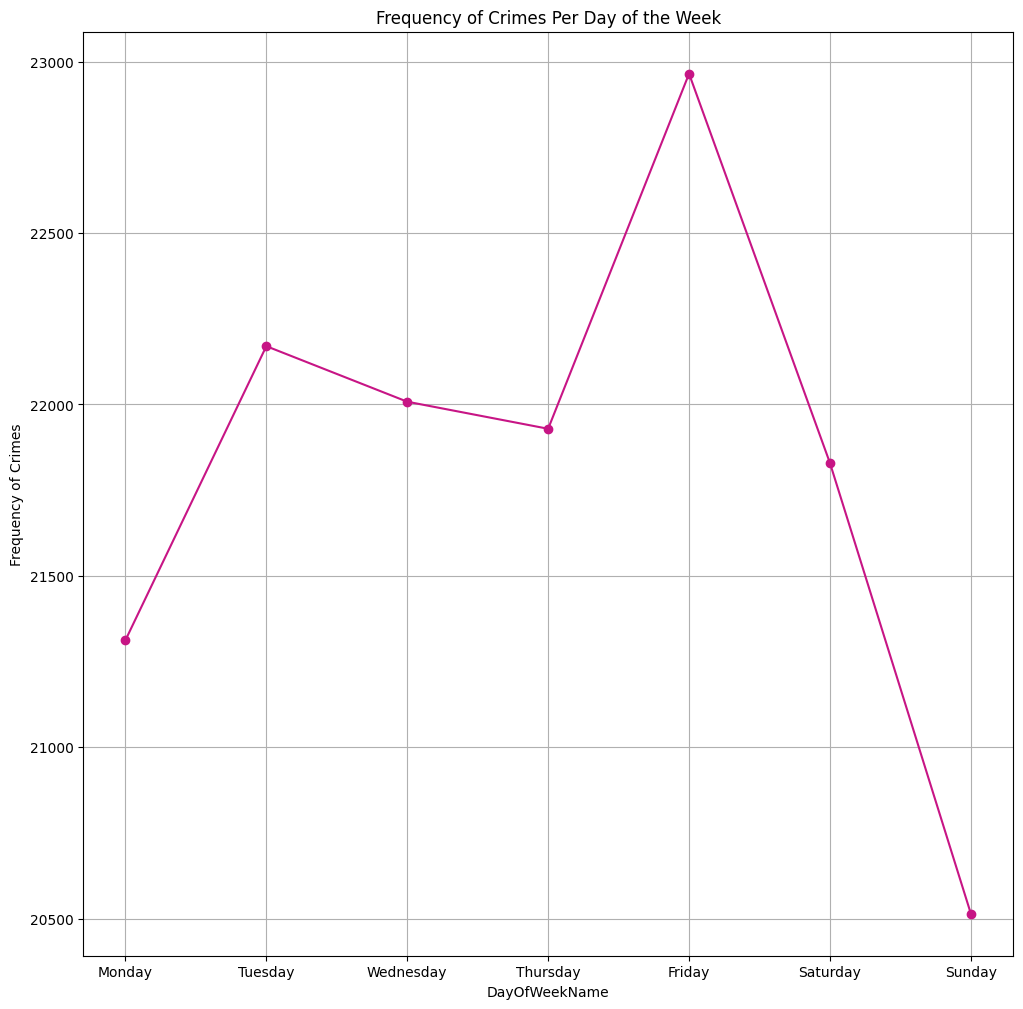

In [107]:
df['DayOfWeekName'] = pd.Categorical(df['DayOfWeekName'], 
                                 categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], 
                                 ordered=True)
crime_per_day = df['DayOfWeekName'].value_counts().sort_index()
crime_per_day.index.values

fig = plt.figure(figsize=(12, 12))

plt.title("Frequency of Crimes Per Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Frequency of Crimes")

# ax = crime_per_day.plot(kind='barh')
ax = crime_per_day.plot(grid=True, marker='o', color='mediumvioletred')

# Quick Note for string X tick labels:
# .set_xticks() on the axes will set the locations and set_xticklabels() will set the displayed text.
ax.set_xticks([0, 1, 2, 3, 4, 5, 6])
ax.set_xticklabels(crime_per_day.index)

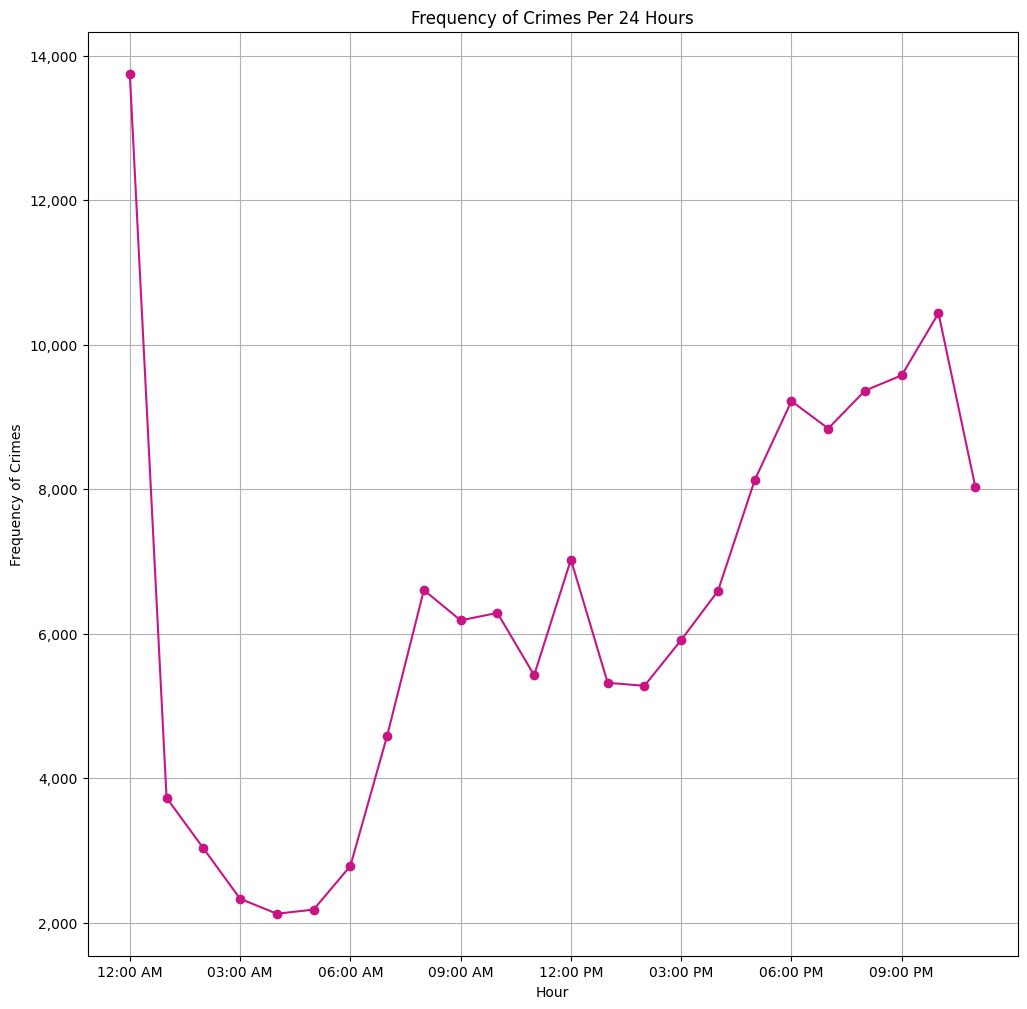

In [100]:
def convert_time(hour):
    d = datetime.strptime(str(hour), "%H")
    return d.strftime("%I:%M %p")

crime_per_time = df["Hour"].value_counts().sort_index()
crime_per_time

# Plot all crimes over the 24 hours
fig=plt.figure(figsize=(12, 12))

plt.title("Frequency of Crimes Per 24 Hours")
plt.xlabel("Time of Crime")
plt.ylabel("Frequency of Crimes")

ax = crime_per_time.plot(grid=True, marker='o', color='mediumvioletred')

ax.set_xticks(crime_per_time.index[::3])

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: convert_time(x)))
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

(0.0, 24.5)

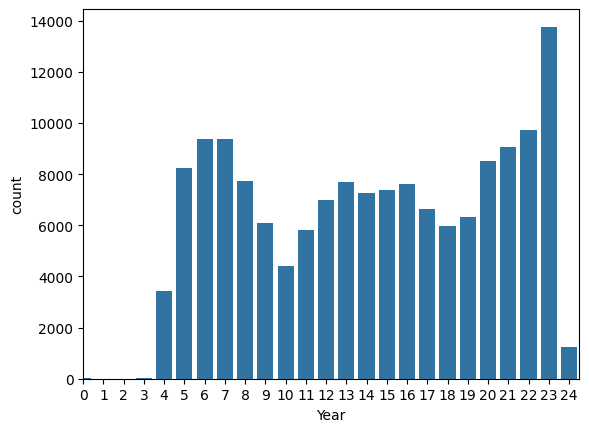

In [110]:
df['Year']= df["Year"]%100
fig, ax = plt.subplots()
ax= sns.barplot(df["Year"].value_counts(), ax=ax)
ax.set_xlim(0,24.5)

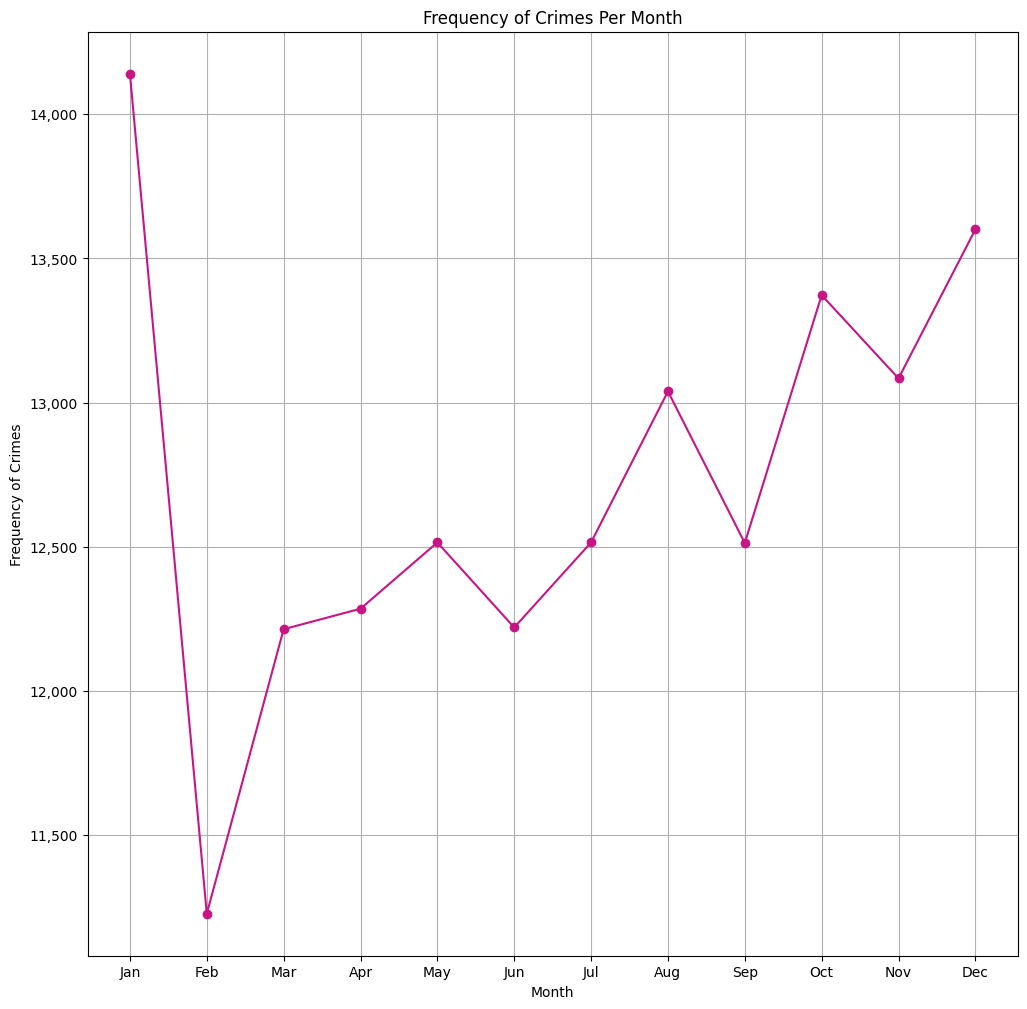

In [101]:
crime_per_month = df['Month'].value_counts().sort_index()
crime_per_month

import calendar

def convert_month(num):
    return calendar.month_abbr[num]

fig=plt.figure(figsize=(12, 12))

plt.title("Frequency of Crimes Per Month")
plt.xlabel("Month of Crime")
plt.ylabel("Frequency of Crimes")

ax = crime_per_month.plot(grid=True, marker='o', color='mediumvioletred')

ax.set_xticks(crime_per_month.index)

ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: convert_month(x)))

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

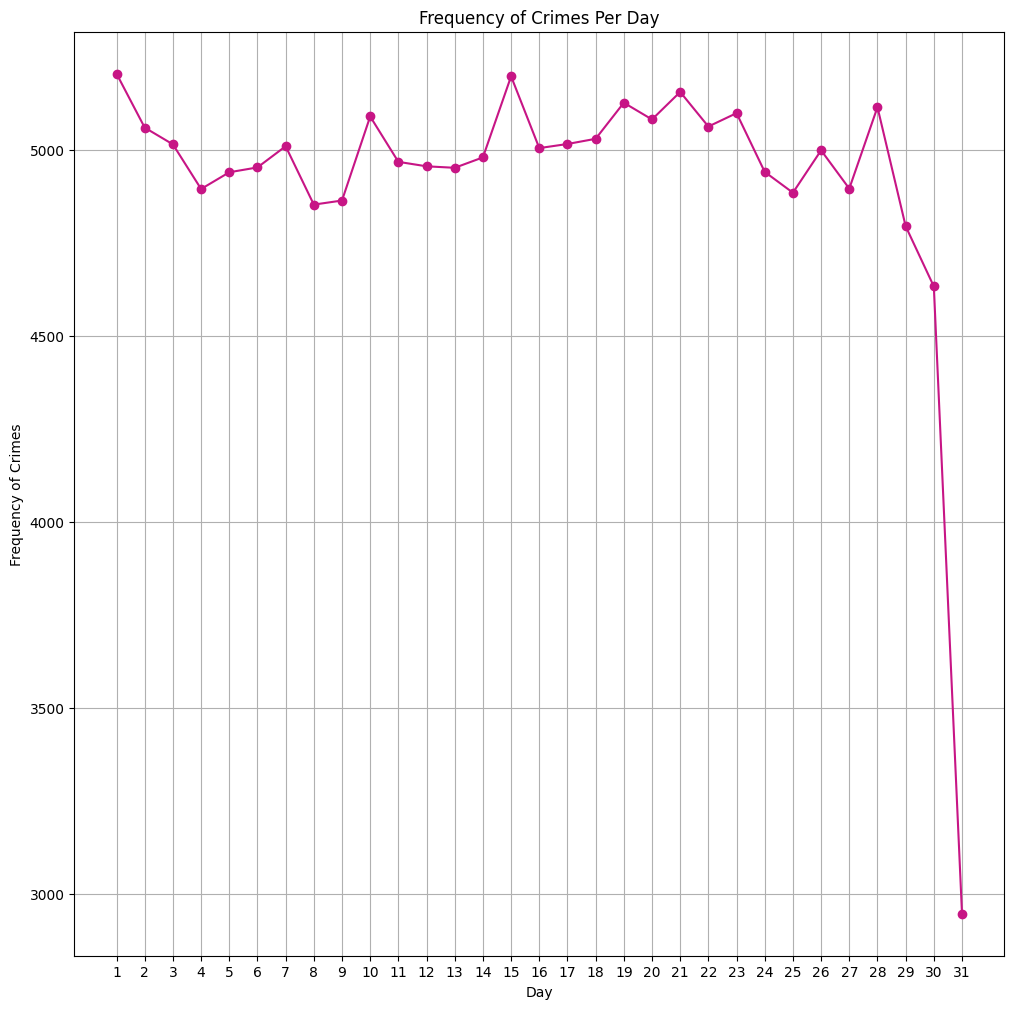

In [128]:
crime_per_day = df['Day'].value_counts().sort_index()
crime_per_day
fig=plt.figure(figsize=(12, 12))

plt.title("Frequency of Crimes Per Day")
plt.xlabel("Day of Crime")
plt.ylabel("Frequency of Crimes")

ax = crime_per_day.plot(grid=True, marker='o', color='mediumvioletred')

ax.set_xticks(crime_per_day.index)


In [72]:
from sklearn import preprocessing 
le = preprocessing.LabelEncoder() 
  
# Encode labels in column 'CrimeType'. 
df['Categorical']= le.fit_transform(df['CrimeType']) 
  
df['Categorical'].unique() 
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'OTHER': 0, 'STOLEN VEHICLE': 1, 'STOLEN/RECOVERED': 2}


In [73]:
def replace_street_type(x):
    if x == 'AV' or x == 'ST' or x == 'BLVD' or x == 'DR' or x == 'WY':
        return x
    else:
        return 'OTHER'

In [74]:
df['StreetType'] = df['StreetType'].apply(replace_street_type)

In [75]:
df['StreetType'].value_counts()

StreetType
AV       59106
ST       57867
OTHER    15730
BLVD     11547
DR        4648
WY        3829
Name: count, dtype: int64

<Axes: xlabel='StreetType', ylabel='count'>

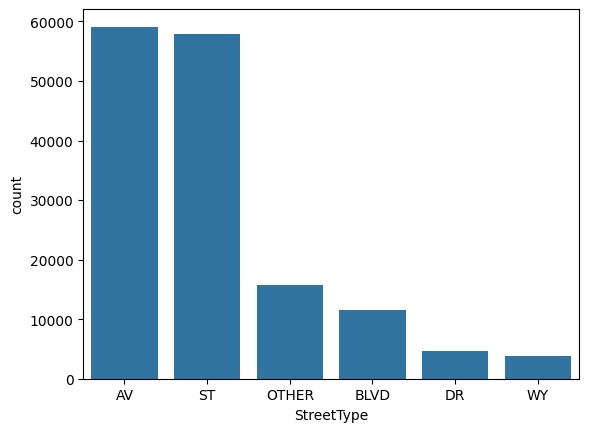

In [76]:
sns.barplot(df['StreetType'].value_counts())

In [77]:
!pip install geopandas

In [78]:
import geopandas
from shapely.geometry import Point

In [79]:
df['geometry'] = df.apply(lambda row: Point(row['X'], row['Y']), axis=1)

In [80]:
df

,CrimeType,PoliceBeat,Address,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y,AddressNum,AddressName,StreetType,Categorical,geometry
0,OTHER,31Y,"9609, MADDUX ,DR",30,9,22,23,4,Friday,-122.186243,37.736909,9609,MADDUX,DR,0,POINT (-122.186243032 37.736909007)
1,OTHER,06X,"2420, SAN PABLO ,AV",5,10,22,3,2,Wednesday,-122.274354,37.815111,2420,SAN PABLO,AV,0,POINT (-122.274354017 37.81511099)
2,STOLEN VEHICLE,16Y,"1123, EL CENTRO ,AV",27,11,13,11,2,Wednesday,-122.219455,37.810371,1123,EL CENTRO,AV,1,POINT (-122.219454982 37.810370982)
3,OTHER,32Y,"2374, 108TH ,AV",19,12,13,23,3,Thursday,-122.153223,37.740881,2374,108TH,AV,0,POINT (-122.153223028 37.740880981)
4,STOLEN VEHICLE,07X,"3129, SAN PABLO ,AV",28,1,14,11,1,Tuesday,-122.277448,37.822463,3129,SAN PABLO,AV,1,POINT (-122.277448029 37.822463008)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152722,STOLEN VEHICLE,34X,"1839, 92ND ,AV",16,9,12,9,6,Sunday,-122.168818,37.751276,1839,92ND,AV,1,POINT (-122.168817977 37.751276008)
152723,STOLEN VEHICLE,12X,"4145, ,BROADWAY",17,8,12,9,4,Friday,-122.255740,37.829839,4145,,OTHER,1,POINT (-122.25573999 37.829838999)
152724,STOLEN/RECOVERED,33X,"725, 85TH ,AV",16,5,22,12,0,Monday,-122.188371,37.748725,725,85TH,AV,2,POINT (-122.18837103 37.748725017)
152725,STOLEN VEHICLE,08X,"2300, WAVERLY ,ST",11,5,22,12,2,Wednesday,-122.263053,37.811663,2300,WAVERLY,ST,1,POINT (-122.263053061 37.811662954)


In [81]:
geo_police_data = geopandas.GeoDataFrame(df, geometry='geometry')
geo_police_data.crs = {'init': 'epsg:4326'}
geo_police_data

c:\Users\thinh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,CrimeType,PoliceBeat,Address,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y,AddressNum,AddressName,StreetType,Categorical,geometry
0,OTHER,31Y,"9609, MADDUX ,DR",30,9,22,23,4,Friday,-122.186243,37.736909,9609,MADDUX,DR,0,POINT (-122.18624 37.73691)
1,OTHER,06X,"2420, SAN PABLO ,AV",5,10,22,3,2,Wednesday,-122.274354,37.815111,2420,SAN PABLO,AV,0,POINT (-122.27435 37.81511)
2,STOLEN VEHICLE,16Y,"1123, EL CENTRO ,AV",27,11,13,11,2,Wednesday,-122.219455,37.810371,1123,EL CENTRO,AV,1,POINT (-122.21945 37.81037)
3,OTHER,32Y,"2374, 108TH ,AV",19,12,13,23,3,Thursday,-122.153223,37.740881,2374,108TH,AV,0,POINT (-122.15322 37.74088)
4,STOLEN VEHICLE,07X,"3129, SAN PABLO ,AV",28,1,14,11,1,Tuesday,-122.277448,37.822463,3129,SAN PABLO,AV,1,POINT (-122.27745 37.82246)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152722,STOLEN VEHICLE,34X,"1839, 92ND ,AV",16,9,12,9,6,Sunday,-122.168818,37.751276,1839,92ND,AV,1,POINT (-122.16882 37.75128)
152723,STOLEN VEHICLE,12X,"4145, ,BROADWAY",17,8,12,9,4,Friday,-122.255740,37.829839,4145,,OTHER,1,POINT (-122.25574 37.82984)
152724,STOLEN/RECOVERED,33X,"725, 85TH ,AV",16,5,22,12,0,Monday,-122.188371,37.748725,725,85TH,AV,2,POINT (-122.18837 37.74873)
152725,STOLEN VEHICLE,08X,"2300, WAVERLY ,ST",11,5,22,12,2,Wednesday,-122.263053,37.811663,2300,WAVERLY,ST,1,POINT (-122.26305 37.81166)


In [82]:
oakland_districts = geopandas.read_file('oakland.geojson')
oakland_districts.crs = {'init': 'epsg:4326'}
oakland_districts = oakland_districts.set_geometry('geometry')

c:\Users\thinh\AppData\Local\Programs\Python\Python312\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [83]:
df= geopandas.tools.sjoin(geo_police_data, oakland_districts,how='left')
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 152727 entries, 0 to 152726
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   CrimeType      152727 non-null  object  
 1   PoliceBeat     152196 non-null  object  
 2   Address        152677 non-null  object  
 3   Day            152727 non-null  int32   
 4   Month          152727 non-null  int32   
 5   Year           152727 non-null  int32   
 6   Hour           152727 non-null  int32   
 7   DayOfWeek      152727 non-null  int32   
 8   DayOfWeekName  152727 non-null  object  
 9   X              152726 non-null  float64 
 10  Y              152726 non-null  float64 
 11  AddressNum     152677 non-null  object  
 12  AddressName    152450 non-null  object  
 13  StreetType     152727 non-null  object  
 14  Categorical    152727 non-null  int32   
 15  geometry       152727 non-null  geometry
 16  index_right    152135 non-null  float64 
 17  Name   

In [84]:
df.drop(['index_right', 'Descriptio'], axis= 1, inplace= True)

In [85]:
df.rename(columns={"Name": "District"}, inplace=True)
df

,CrimeType,PoliceBeat,Address,Day,Month,Year,Hour,DayOfWeek,DayOfWeekName,X,Y,AddressNum,AddressName,StreetType,Categorical,geometry,District
0,OTHER,31Y,"9609, MADDUX ,DR",30,9,22,23,4,Friday,-122.186243,37.736909,9609,MADDUX,DR,0,POINT (-122.18624 37.73691),7
1,OTHER,06X,"2420, SAN PABLO ,AV",5,10,22,3,2,Wednesday,-122.274354,37.815111,2420,SAN PABLO,AV,0,POINT (-122.27435 37.81511),3
2,STOLEN VEHICLE,16Y,"1123, EL CENTRO ,AV",27,11,13,11,2,Wednesday,-122.219455,37.810371,1123,EL CENTRO,AV,1,POINT (-122.21945 37.81037),5
3,OTHER,32Y,"2374, 108TH ,AV",19,12,13,23,3,Thursday,-122.153223,37.740881,2374,108TH,AV,0,POINT (-122.15322 37.74088),7
4,STOLEN VEHICLE,07X,"3129, SAN PABLO ,AV",28,1,14,11,1,Tuesday,-122.277448,37.822463,3129,SAN PABLO,AV,1,POINT (-122.27745 37.82246),3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152722,STOLEN VEHICLE,34X,"1839, 92ND ,AV",16,9,12,9,6,Sunday,-122.168818,37.751276,1839,92ND,AV,1,POINT (-122.16882 37.75128),7
152723,STOLEN VEHICLE,12X,"4145, ,BROADWAY",17,8,12,9,4,Friday,-122.255740,37.829839,4145,,OTHER,1,POINT (-122.25574 37.82984),1
152724,STOLEN/RECOVERED,33X,"725, 85TH ,AV",16,5,22,12,0,Monday,-122.188371,37.748725,725,85TH,AV,2,POINT (-122.18837 37.74873),7
152725,STOLEN VEHICLE,08X,"2300, WAVERLY ,ST",11,5,22,12,2,Wednesday,-122.263053,37.811663,2300,WAVERLY,ST,1,POINT (-122.26305 37.81166),3


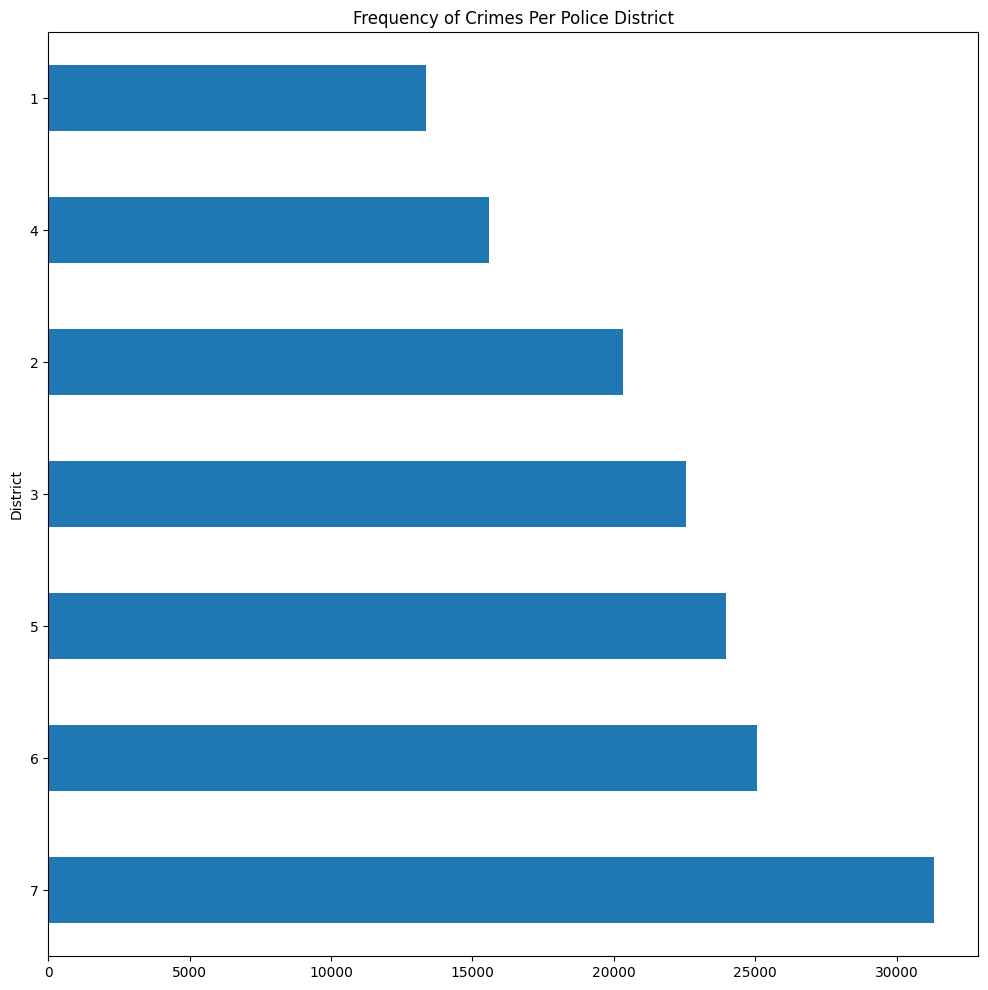

In [113]:
crime_per_PD = df['District'].value_counts()
crime_per_PD

fig=plt.figure(figsize=(12, 12))

plt.title("Frequency of Crimes Per Police District")
plt.xlabel("Police District")
plt.ylabel("Frequency of Crimes")

ax = crime_per_PD.plot(kind='barh')


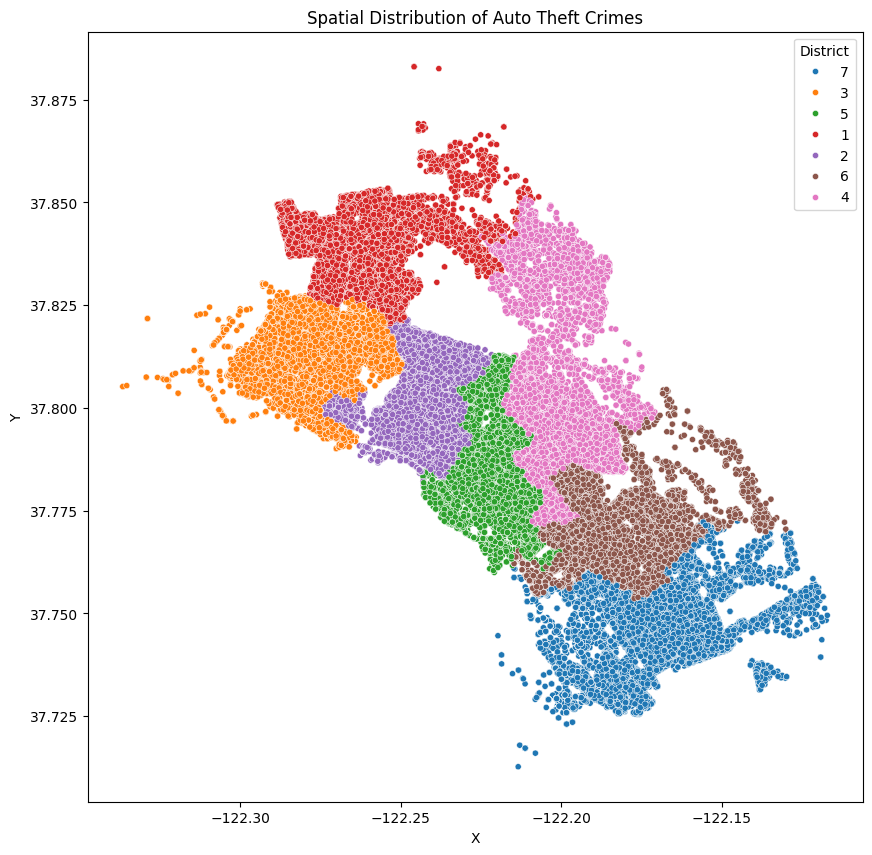

In [87]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='X', y='Y', data=df, hue='District', legend='full', s=20)
plt.title('Spatial Distribution of Auto Theft Crimes')
plt.show()

  District  Hour  crime_count
0        1     0         1099
1        1     1          309
2        1     2          216 



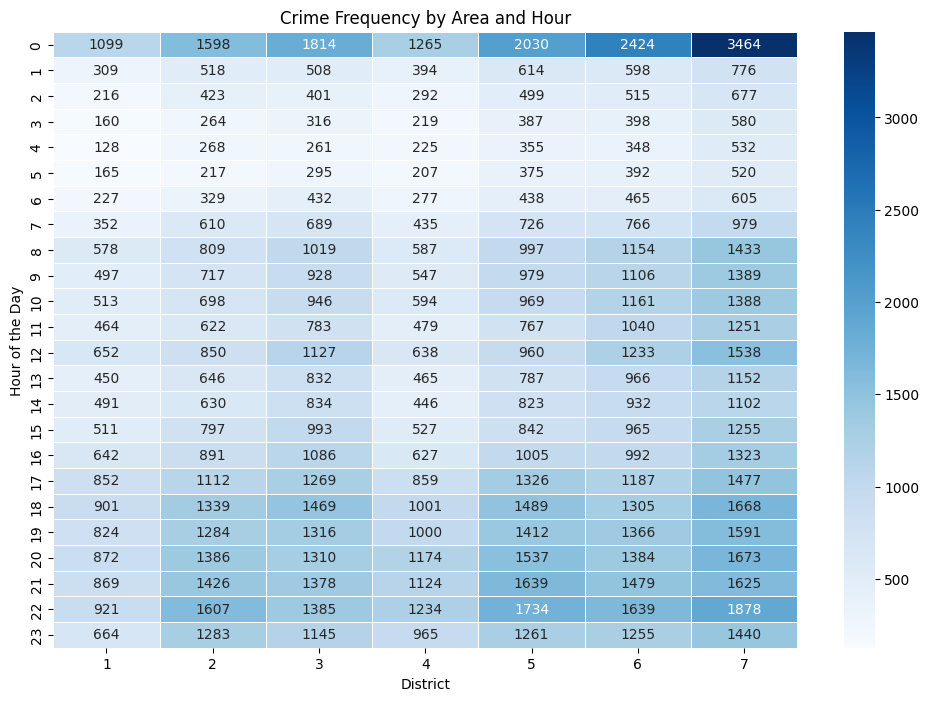

In [117]:
crime_frequency = df.groupby(['District', 'Hour']).size().reset_index(name='crime_count')
print(crime_frequency.head(3), "\n")

crime_pivot = crime_frequency.pivot(index='Hour', columns='District', values='crime_count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(crime_pivot, cmap='Blues', annot=True, fmt='g', linewidths=.5)
plt.title('Crime Frequency by Area and Hour')
plt.xlabel('District')
plt.ylabel('Hour of the Day')
plt.show()


C:\Windows\Temp\ipykernel_19476\1056763206.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_hour_crime_frequency = df.groupby(['DayOfWeekName', 'Hour']).size().reset_index(name='count')


  DayOfWeekName  Hour  count
0        Monday     0   1965
1        Monday     1    500
2        Monday     2    435 



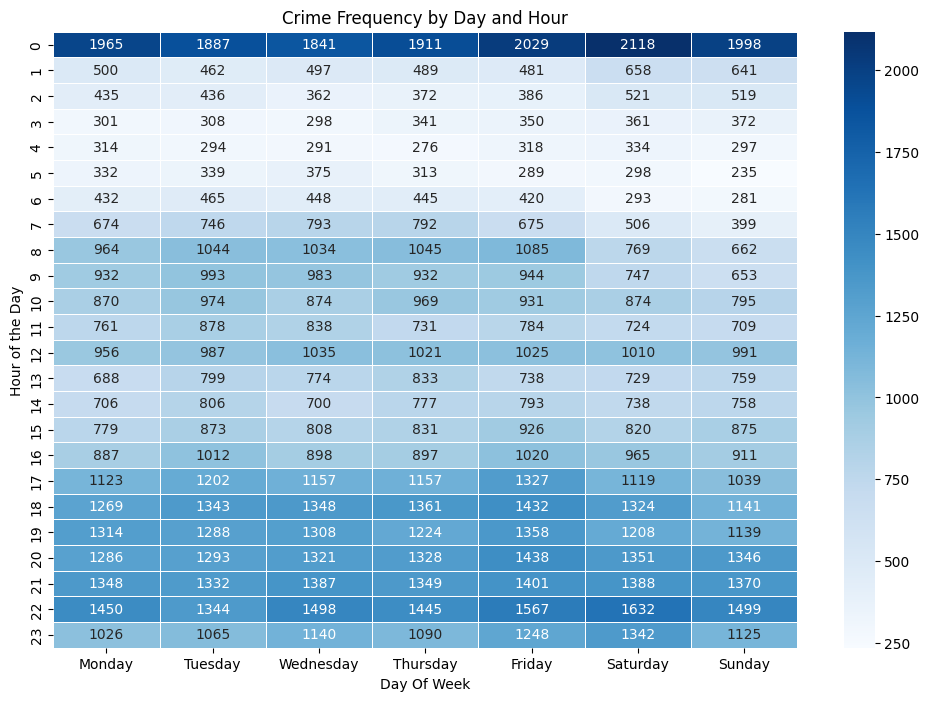

In [124]:
day_hour_crime_frequency = df.groupby(['DayOfWeekName', 'Hour']).size().reset_index(name='count')
print(day_hour_crime_frequency.head(3), "\n")

day_hour_crime_pivot = day_hour_crime_frequency.pivot(index='Hour', columns='DayOfWeekName', values='count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(day_hour_crime_pivot, cmap='Blues', annot=True, fmt='g', linewidths=.5)
plt.title('Crime Frequency by Day and Hour')
plt.xlabel('Day Of Week')
plt.ylabel('Hour of the Day')
plt.show()
